In [23]:
import os
import numpy as np
import pandas as pd
from pathlib import Path

import pysd
import pysd.translators.vensim.vensim_file
import matplotlib.pyplot as plt 


## Importing and Convering FeliX Files
1) Converting to .py
2) Running as a .py

I have finally finished a version of FeliX with terrible fixes that converts and run i.e. deleting formulas, as a way just to test the list of problems. Here is a compilation of all issues "resolved":

Warning Messages:
- Incomplete Subscripts: https://github.com/SDXorg/pysd/issues/65

List of issues on FeliX for pysd compatibility:
- (Lookups must not have repeated x dimensions) e.g [1,5],[1,6],[1,7];
- labor force participation fraction variation (maximum recursion depth exceeded)
- survivors at exact age x (maximum recursion depth exceeded)
- Production rate of animal food (maximum recursion depth exceeded)
- Total person years of interest pT (maximum recursion depth exceeded)
- Total person years of interest pT POVERTY (maximum recursion depth exceeded)
- Total person years of interest pT HEALTH (maximum recursion depth exceeded)
- Total person years of interest pT EDUCATION (maximum recursion depth exceeded)
- Birth Gender Fraction (maximum recursion depth exceeded)
- Total person years T (maximum recursion depth exceeded)
- n_fertilizer_shares2 (maximum recursion depth exceeded)
- poisson_arrivals (Not implemented function 'random_poisson')

My guess for maximum recursion depth that it isnt able to call a different subscript internally e.g. var[cropmeat] = 1; var[eggs] = var[cropmeat] or [NextCohort] doesnt work. Probably to do with how it translates into python script

In [22]:
# 1) Converting .mdl to .py file
model = pysd.read_vensim('FeliXTests/FeliX3_YoGL_v25_pysdtests.mdl')

# load existing py file
#model = pysd.load('FeliXTests/FeliX3_YoGL_v25_pysdtests.py')

# 2) running as a .py file
stocks = model.run()

c:\Users\tanryan\AppData\Local\anaconda3\envs\felixcheck\Lib\site-packages\pysd\builders\python\subscripts.py:350: UserWarning: 
Dimension given by subscripts:
	{'"15-19"', '"10-14"'}
is incomplete using SchoolEnrollment instead.
Subscript_dict:
	{'YoGL cohorts': ['"20-24"', '"25-29"', '"30-34"', '"35-39"', '"40-44"', '"45-49"', '"50-54"', '"55-59"', '"60-64"', '"65-69"', '"70-74"', '"75-79"', '"80-84"', '"85-89"', '"90-94"', '"95-99"', '"100+"'], 'SchoolEnrollment': ['"5-9"', '"10-14"', '"15-19"', '"20-24"'], 'PrimaryEdButOldest': ['"10-14"', '"15-19"', '"20-24"', '"25-29"', '"30-34"', '"35-39"', '"40-44"', '"45-49"', '"50-54"', '"55-59"', '"60-64"', '"65-69"', '"70-74"', '"75-79"', '"80-84"', '"85-89"', '"90-94"', '"95-99"'], '"15 to 24"': ['"15-19"', '"20-24"'], '"25 to 54"': ['"25-29"', '"30-34"', '"35-39"', '"40-44"', '"45-49"', '"50-54"'], '"55 to 64"': ['"55-59"', '"60-64"'], 'Labor force type': ['skill', 'unskill'], '"15 to 39"': ['"15-19"', '"20-24"', '"25-29"', '"30-34"', '"3

In [33]:
model.doc
stocks

,FINAL TIME,INITIAL TIME,SAVEPER,TIME STEP,SC Init,Share of Investment in Revenue Coal,Total Investment in Coal,Share of Upstream Investment in Total Investment Coal,IO Var S,ODR S,...,Potential Oil Production,INIT COPN,MINOFD,Potential Oil Production from Resources,Oil Production Coverage,Fraction Invested in Oil Discovery Technology,Oil Revenue,Oil Shortage,Oil Production,Oil Exploration Rate
time,,,,,,,,,,,,,,,,,,,,,
1900.0,2100,1900,1,0.125,2,1.652778,5.088362e+10,0.753623,5.0,6,...,12.506800,0,0.02,14.744262,18.044072,0.800000,1.118530e+08,2.237462,12.506800,11.452519
1901.0,2100,1900,1,0.125,2,1.550585,5.129170e+10,0.753623,5.0,6,...,10.272172,0,0.02,10.272172,11.803087,0.800000,2.359905e+08,5.514030,10.272172,14.531855
1902.0,2100,1900,1,0.125,2,1.328087,5.333250e+10,0.753623,5.0,6,...,7.988152,0,0.02,7.988152,13.726051,0.797647,3.404757e+08,9.465603,7.988152,23.869623
1903.0,2100,1900,1,0.125,2,1.189304,5.518122e+10,0.753623,5.0,6,...,7.886664,0,0.02,7.886664,18.085964,0.792129,3.402867e+08,11.432443,7.886664,39.417957
1904.0,2100,1900,1,0.125,2,1.114926,5.658015e+10,0.753623,5.0,6,...,9.543750,0,0.02,9.543750,22.144018,0.785921,2.920756e+08,11.766335,9.543750,57.161711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2096.0,2100,1900,1,0.125,2,0.253266,5.928471e+10,0.753623,5.0,6,...,4837.802148,0,0.02,5120.222101,19.796472,0.022332,9.698390e+10,208.715852,4837.802148,3968.419840
2097.0,2100,1900,1,0.125,2,0.258437,6.023330e+10,0.753623,5.0,6,...,4798.356162,0,0.02,5075.666106,19.779021,0.022135,9.770079e+10,205.722589,4798.356162,3941.913753
2098.0,2100,1900,1,0.125,2,0.263634,6.120020e+10,0.753623,5.0,6,...,4759.061943,0,0.02,5033.529470,19.764043,0.021942,9.839519e+10,202.447490,4759.061943,3915.696976


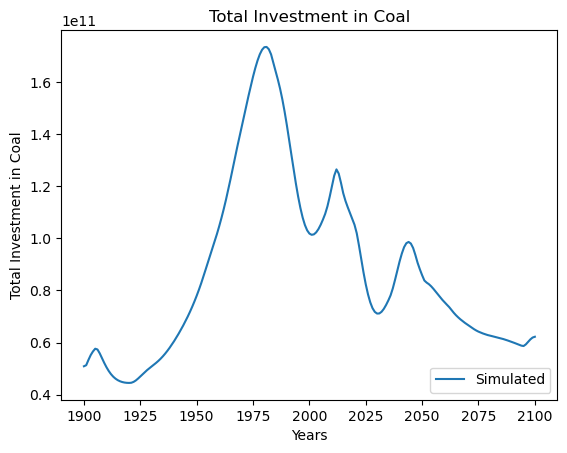

In [35]:
# plot random variables 
var = "Total Investment in Coal" #Call Python Name

plt.plot(stocks.index, stocks[var], label='Simulated')
plt.xlabel('Years')
plt.ylabel(var)
plt.title(var)
plt.legend(loc='lower right')

In [ ]:
# run model
